In [ ]:
# CONNECT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('drive/MyDrive/Colab Notebooks/Topic Modeling - LDA/transcription1.csv', sep=';')
df.tail(1)

,No;Text
0,"1;Saya bersedia, Pak Anis, mengundang Pak Anis..."


In [ ]:
import matplotlib.pyplot as plt
import string
from wordcloud import WordCloud, ImageColorGenerator

In [ ]:
def removePunctuation(strs):
    remove = string.punctuation
    remove = remove.replace(",", "") # don't remove hyphens
    remove = remove.replace(".", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern

    h = re.sub(pattern, " ", strs)
    return h

def replace(strs):
    strs = strs.replace('\n','')
    strs = strs.replace('\t','')
    strs = strs.replace('rt','')
    return strs

def tokenize(strs):
    tokenizer = TweetTokenizer()
    nltk_tokens = tokenizer.tokenize(strs)
    return nltk_tokens

In [ ]:
#PREPROCESSING
import nltk
import re

nltk.download("punkt")
data = df
data['Text'] = [i.lower() for i in df.Text.astype(str)] #lowertext
data['Text'] = [removePunctuation(i) for i in data.Text] #remove punctuation
data['Text'] = [replace(j) for j in data.Text] #replace \n \t rt
data['token'] = [nltk.word_tokenize(i) for i in data.Text] #tokenize string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
data.tail(1)

,No,Text,token,token_bersih
0,1,saya bersedia pak anis mengundang pak anis ...,"[saya, bersedia, pak, anis, mengundang, pak, a...",bersedia anis mengundang anis yang anis suka d...


In [ ]:
nltk.download('stopwords')

stopwords = set(nltk.corpus.stopwords.words())
def clean_stopwords(text):
    res = []
    for word in text:
        if word not in stopwords:
            res.append(word)
    return res

data['token_bersih'] = [clean_stopwords(i) for i in data.token]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data.tail(1)

,No,Text,token,token_bersih
0,1,saya bersedia pak anis mengundang pak anis ...,"[saya, bersedia, pak, anis, mengundang, pak, a...","[bersedia, anis, mengundang, anis, yang, anis,..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert lists of tokens to space-separated strings and handle missing values
data['token_bersih'] = data['token_bersih'].fillna('').apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the data
data_vektor = vectorizer.fit_transform(data['token_bersih'])

# Buat DataFrame baru dengan kolom kata dan kuantitasnya
word_counts = pd.DataFrame(list(zip(vectorizer.get_feature_names_out(), data_vektor.sum(axis=0).tolist()[0])), columns=['Kata', 'Kuantitas'])

# Print DataFrame dengan kolom kata dan kuantitasnya
print(word_counts)

             Kata  Kuantitas
0              50          1
1            alat          2
2            anis          3
3          barang          2
4            bawa          2
5           bekas          2
6        benarnya          1
7        bersedia          1
8            data          2
9         diskusi          1
10       download          1
11      informasi          1
12       jelajahi          1
13     mengundang          1
14  menyelesatkan          1
15          metro          1
16        ngomong          2
17       peahanan          1
18       profesor          1
19         rakyat          1
20        sebenar          1
21           suka          1
22             tv          1
23            x10          1
24           yang          2


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components = 3, random_state = 42)
lda.fit(data_vektor)

LatentDirichletAllocation(n_components=3, random_state=42)

In [ ]:
data_vektor.shape

(1, 25)

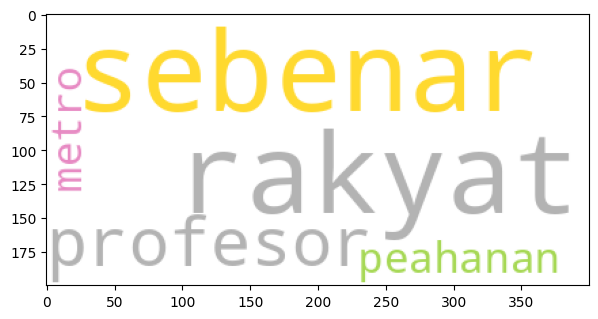

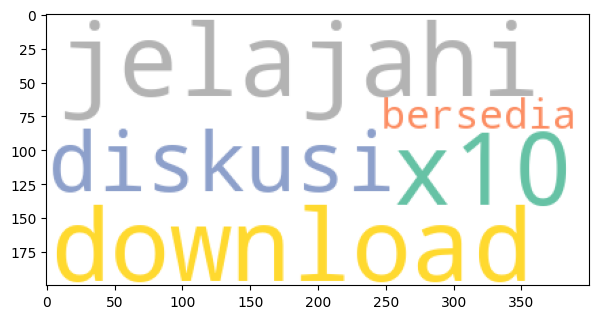

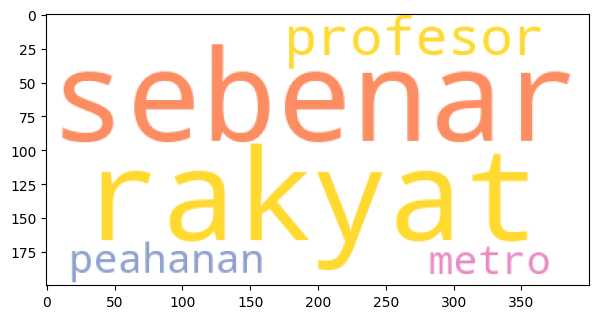

In [ ]:
# Get the feature names from the CountVectorizer
feature_names = vectorizer.get_feature_names_out()

for index, topic in enumerate(lda.components_):
    tmps = [feature_names[i] for i in topic.argsort()[-15:]]
    text = " ".join(str(topik) for topik in tmps)
    wordcloud = WordCloud(max_words=5, colormap='Set2', background_color="white").generate(text)
    plt.figure(figsize=(7, 5))
    plt.imshow(wordcloud)
    plt.show()